In [290]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from math import sqrt
import traceback

'''
    @PARAMETRO_VARIACAO =>
        deve ser o nome de cada pasta dentro das pastas dos algoritmos de roteamento
        Exemplo de hierarquia:
            reports/
            ├── trace_de_mobilidade/
                ├── algoritmo_de_roteamento/
                    ├── PARAMETRO_VARIACAO/
                        ├── report do The ONE (ex.: MessageStatsReports)
'''
PARAMETRO_VARIACAO = "Número de nós maliciosos"

## adicione para mais métricas
DELIVERY_PROB = "delivery_prob"

## lista dos X resultados por métricas (X = número de execuções do simulador)
delivery_rate = []

algoritmos_roteamento = []

In [291]:
def procura_valor(termo,linha,pasta_variacao,lista,offset):
   if linha.find(termo) != -1:
       value = linha[offset:]
       lista.append(float(value))
       

## salva os logs para gerar os plots
def salvar_arquivo(arq_nome, pasta_variacao, media, ic):
    with(open(arq_nome + '.txt', 'a')) as arq:
        arq.write(str(pasta_variacao) + ' ' + str(media) + ' ' + str(ic) + '\n')
        
        
## apaga todos os logs para recomecar processamento
def erase_report_logs():
    arquivos = os.listdir('.')
    for arquivo in arquivos:
        if arquivo.find('.txt') != -1:
            open(arquivo, 'w')
    

erase_report_logs()

In [292]:
ic_95 = {1:12.706, 2:4.303, 3:3.182, 4:2.776, 5:2.571, 
         6:2.447, 7:2.365, 8:2.306, 9:2.262, 10:2.228,
         11:2.201, 12:2.179, 13:2.160, 14:2.145, 15:2.131,
         16:2.120, 17:2.110, 18:2.101, 19:2.093, 20:2.086,
         21:2.080, 22:2.074, 23:2.069, 24:2.064, 25:2.060, 
         26:2.056, 27:2.052, 28:2.048, 29:2.045, 30:2.042,
         31:2.040, 32:2.037, 33:2.035, 34:2.032, 35:2.030,
}


#Calcula a média
def media(lista):
    return sum(lista)/len(lista)


#Calcula o desvio padrão
def desvPad(lista):
    med = media(lista)
    soma = 0.0
    for i in lista:
         soma = (i - med)**2 + soma
    return soma/(len(lista) - 1)


#calcula a variância
def variancia(lista):
    desvio = desvPad(lista)
    return sqrt(desvio)
    

#calcula o intervalo de confiança utilizando a distribuição
#t-student e nível de 95% de confiança
#toDo: disponibilizar opção de escolher o nível de conf.
def confidence(lista):
    graus_de_liberdade = len(lista) - 1
    try:
        value = ic_95[graus_de_liberdade]
        confidenceValue = value * (variancia(lista)/sqrt(len(lista)))
        return confidenceValue
    except Exception as e:
        traceback.print_exc()

In [293]:
'''
    @reports => 
        Pasta do modelo de mobilidade usado
'''
reports_dir = os.path.join(os.getcwd(), 'reports')
'''
    @pastas => 
        Pastas de cada algoritmo testado (ex.: roteamento)
'''
for reports in os.listdir(reports_dir):
    report = os.path.join(reports_dir, reports)
    pastas = os.listdir(report)
    pastas = [os.path.join(report, p) for p in pastas if os.path.isdir(
            os.path.join(report, p)
        )]
    algoritmos_roteamento.append(reports)
        
    print(f"\n##### executando ROTEAMENTO = {reports} #####")

    for pasta in pastas:
        if os.path.isdir(pasta):

            '''
                alguma_variacao pode representar o nome de uma pasta com alguma variacao para cada
                algoritmo de roteamento, por exemplo tamanho de buffer, número de nós maliciosos, etc
            '''
            tam_aux = len(pasta.split('\\'))-1
            algoritmo = pasta.split('\\')[tam_aux]
            print(f"\t##### executando ALGORITMO = {algoritmo} #####\n")

            alguma_variacao = os.listdir(pasta)
            for pasta_variacao in alguma_variacao:
                if os.path.isdir(os.path.join(pasta, pasta_variacao)):
                    pasta_reports = os.path.join(pasta, pasta_variacao)

                    '''
                        @pasta_reports => 
                            cada pasta_reports tem X execucoes do mesmo código, nesse caso X = 10
                        @arquivo => 
                            cada um dos X arquivos
                    '''
                    for arquivo in os.listdir(pasta_reports):
                        arq = open(pasta_reports+"/"+arquivo,'r')
                        for linha in arq.readlines():
                            procura_valor(DELIVERY_PROB,linha,pasta_variacao,delivery_rate,15)
                        arq.close()
                    print(f"resultados delivery_prob = {delivery_rate}")
                    ic = confidence(delivery_rate)
                    salvar_arquivo(DELIVERY_PROB + '_' + reports + '_' + algoritmo, pasta_variacao, sum(delivery_rate)/len(delivery_rate), ic)
                    '''
                        reinicializa as listas para cada novo algoritmo testado em @pasta
                    '''
                    delivery_rate = []


##### executando ROTEAMENTO = infocom #####
	##### executando ALGORITMO = maxprop #####

resultados delivery_prob = [0.93, 0.949, 0.912, 0.922, 0.956, 0.931, 0.911, 0.919, 0.972, 0.925]
resultados delivery_prob = [0.96, 0.943, 0.946, 0.96, 0.955, 0.924, 0.935, 0.921, 0.941, 0.922]
resultados delivery_prob = [0.921, 0.943, 0.937, 0.949, 0.907, 0.937, 0.925, 0.937, 0.928, 0.953]
resultados delivery_prob = [0.959, 0.937, 0.932, 0.915, 0.943, 0.919, 0.927, 0.93, 0.942, 0.928]
resultados delivery_prob = [0.921, 0.963, 0.955, 0.946, 0.922, 0.929, 0.959, 0.943, 0.907, 0.933]
resultados delivery_prob = [0.918, 0.918, 0.942, 0.92, 0.934, 0.938, 0.926, 0.918, 0.918, 0.923]
	##### executando ALGORITMO = prophetv2 #####

resultados delivery_prob = [0.716, 0.736, 0.71, 0.733, 0.741, 0.721, 0.71, 0.721, 0.755, 0.716]
resultados delivery_prob = [0.745, 0.734, 0.74, 0.755, 0.745, 0.741, 0.733, 0.714, 0.729, 0.745]
resultados delivery_prob = [0.71, 0.731, 0.73, 0.736, 0.713, 0.741, 0.725, 0.734, 0.722

In [294]:
'''
    gera plot dos arquivos
    
    @metricas =>
        todas as metricas analisadas, acrescente mais, se necessario
    @metricas_ylabel =>
        label no gráfico para cada metrica, acrescente 1 para cada metrica
'''
metricas = [DELIVERY_PROB]
metricas_ylabel = ['Probabilidade de entrega']
plots_por_roteamento = []
plots_por_metrica = []
curvas = []

for algoritmo_roteamento in algoritmos_roteamento:
    for metrica in metricas:
        for arquivo in os.listdir('.'):
            if arquivo.find(metrica) != -1:
                if arquivo.find(algoritmo_roteamento) != -1:
                    label = arquivo.split('_')[-1].split('.')[0]
                    data = np.genfromtxt(arquivo)
                    df = pd.DataFrame({'exec_status': data[:,0], label: data[:,1], 'confidence': data[:,2]})
                    curvas.append(df)
        plots_por_metrica.append(curvas)
        curvas = []
    plots_por_roteamento.append(plots_por_metrica)
    plots_por_metrica = []

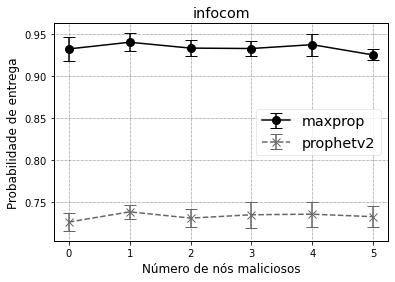

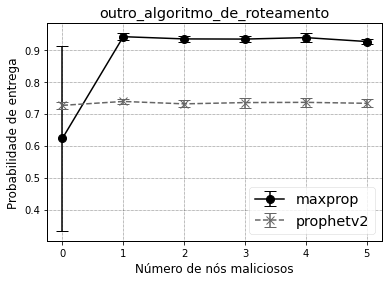

In [295]:
'''
    Referência de estilos: https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
'''
styles = {'markers':('o','x','+','*','d'),
          'linestyles' : ('solid','dashed','dotted','dashdot','solid')
         }
#plt.style.use('seaborn-dark-palette')
plt.style.use('grayscale')

metricas_ylabel_count = 0
roteamento_title_count = 0
for plot_por_metrica in plots_por_roteamento:
    for curvas in plot_por_metrica:
        fig, ax = plt.subplots()
        fig.patch.set_facecolor('white')
        
        for num, curva in enumerate(curvas):
            plt.errorbar('exec_status', curva.columns.values[1], yerr='confidence', data=curva,
                marker=styles['markers'][num], markersize=8, linewidth=1.5, linestyle=styles['linestyles'][num],
                capsize=6)
                
        plt.xlabel(PARAMETRO_VARIACAO)
        plt.ylabel(metricas_ylabel[metricas_ylabel_count])
        plt.title(algoritmos_roteamento[roteamento_title_count])
        legend = plt.legend(fontsize='x-large')
        legend.get_frame().set_facecolor('#FFFFFF')
        ax.set_axisbelow(True)
        ax.grid(linestyle=':', linewidth='0.5', color='black')
        plt.show()

        metricas_ylabel_count += 1
    roteamento_title_count += 1
    metricas_ylabel_count = 0
